<a href="https://colab.research.google.com/github/BrindanYasodaran/UDL-oxford/blob/main/UDL_Practical_1_Setting_a_Basline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UDL Practical 1 - Setting A Baseline
In this practical we'll go over several concepts you've likely encountered in your life as a machine learning researcher but with a different, more principled point of view. This will help you use and think about these concepts, both during the course and more broadly over the course of your research.

Typically we have some data $D$, pertaining to something in the world, and a model $M$ that we want to describe it. Here "describe" means effectively model it in a way that helps us make meaningful predictions about the world - is this a picture of a cat? Where should a car drive given a certain intersection? and so on and so on. We want to get the model that best describes the world, which if we're being rational, is given by $P(M|D)$.

To connect it to quantities we're familiar with, using Bayes rule we have that
$$
P(M|D) = \frac{P(D|M) P(M)}{P(D)}
$$
or
$$
\text{Posterior} = \frac{\text{Likelihood}\cdot\text{Prior}}{\text{Evidence}}
$$


---
**Q0:** we often talk about modelling the world yet here we have a distribution over models, $P(M|D)$, not a single one - what's our model here? Why would we want an entire distribution and not a specific one?

**A:** _answer me!_


We have a disribution over models rather than a specific one to convery our uncertainty on what we believe the model is, given our data.

If we have no special prior over the models, so $P(M)$ is constant, the posterior distribution simply equals the likelihood:
$$
P(M|D) \propto P(D|M)
$$
whereas otherwise we need to take it into account:
$$
P(M|D) \propto P(D|M)P(M)
$$
The latter can penalize extremely unlikely models by incorporating information from our prior $P(M)$.

Assuming we managed to find the distribution over models given some data - easier said than done! - we usually want to make predictions about new data $D^* = \{(x^*, y^*)\}$.

---
**Q1:** a much easier alternative, albeit an inexact one, is finding a single model that maximizes our posterior. What is this called for each of the two cases outlined above - when our prior is uniform and when it isn't? These are common machine learning terms but you may have not encountered them yet.

**A:** _answer me!_

---

When prior is uniform, finding single model that maximises posterior is MLE. When prior is not uniform, this is MAP estimation.


 Ideally we would consider all possible models instead of just one, that way we can take our uncertainty in each into account. For example, if you're driving and see a large bus, you'd take into account both the case where a kid is about to pop out from behind it and the case when there isn't instead of immediately committing to one.

 In practice, this is done by weighing how well the new data is also explained by these models, giving the predictive distribution
$$
P(y^*|x^*, D) = \int P(y^*|x^*, M) P(M|D) dM
$$

In practice this is difficult due to several reasons. One reason is that it's extremely hard to calculate $P(D)$ in general, as we'd have to calculate over all possible models - and so analytically calculating the predictive distribution is often impossible. More on this later!

## Part A - Weight Decay and Maximum A Posteriori Estimation

When doing Maximum Likelihood Estimation (MLE), we approximate the posterior distribution with $P(M|D) \propto P(D|M)$, and find our model weights using this distribution. Let's illustrate this using a simple linear regression example.

---
**Q2:** derive from first principles the MLE solution for linear regression. To break it into steps:  
a. Assume you have data $\{(x_i,y_i)\}_{i=1}^N$, where $x_i$ are vectors of features of length $d$. You can denote the $x$s stacked into a matrix of size $n\times d$ as $X$. Assuming the data was generated using Gaussian noise with variance $\sigma^2$, what's $P(y|x,w)$, where $w$ is the linear regression's weights? You can assume there's no bias.  
b. What's $P(Y|X,w)$? $Y$ is similarly a vector of length $N$ of all $y_i$.  
c. Find the log-likelihood by taking the log of (b). If we want to find $w$ what loss function are we effectively optimising?  
d. Analytically find $w$ by taking the gradient of (c) and setting it to zero.

It's okay to answer this question quickly if you've already done this, as long as you do it right :)

**A:** _answer me!_

---
Assume no bias term and Gaussian noise:  
$y_i = w^\top x_i + \varepsilon_i,\ \varepsilon_i \sim N(0,\sigma^2)$.

### (a) Single-point likelihood

$P(y \mid x, w)
= N(y \mid w^\top x, \sigma^2)
= \frac{1}{\sqrt{2\pi\sigma^2}}
\exp\Big(-\frac{(y - w^\top x)^2}{2\sigma^2}\Big).$

### (b) Joint likelihood

$P(Y \mid X, w)
= \prod_{i=1}^N P(y_i \mid x_i, w)
= (2\pi\sigma^2)^{-N/2}
\exp\Big(-\frac{\|Y - Xw\|^2}{2\sigma^2}\Big).$

### (c) Log-likelihood and loss

$ \ell(w) = \log P(Y \mid X, w) = -\frac{N}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\|Y - Xw\|^2. $

Maximizing $\ell(w)$ in $w$ is equivalent to minimizing

$L(w) = \|Y - Xw\|^2 $

### (d) MLE solution

Set gradient to zero, we get

$w_{\text{MLE}} = (X^\top X)^{-1} X^\top Y.$


The case above find the MLE linear regressor. Now, let's try penalizing complex models by incorporating a prior over our weights. We typically want simpler models, which is an instance of what's known as _Occam's Razor_ - a simpler explanation is often better than a complex one. Here we can do this by assuming our weights have some prior distribution, e.g. a Gaussian with zero mean and some variance $\tau^2$.

---
**Q3:** let's quickly repeat the previous derivation but now with the new prior. Again, taking it step by step:  
a. What's the posterior distribution over the weights, given this prior?  
b. Taking the log, what's the loss function we're optimising here?  
c. Analytically find $w$ by taking the gradient of (b) and setting it to zero.

**A:** _answer me!_

---

Assume the same likelihood as before and a Gaussian prior on weights  
$w \sim N(0,\tau^2 I)$.

---

### (a) Posterior over $w$

Using Bayes:

$p(w \mid X,Y) \propto P(Y \mid X,w)\,p(w)$

$\propto \exp\Big(
-\frac{1}{2\sigma^2}\|Y - Xw\|^2
-\frac{1}{2\tau^2}\|w\|^2
\Big)$

(so the posterior is Gaussian)

---

### (b) Log-posterior and loss

$\log p(w \mid X,Y)
= -\frac{1}{2\sigma^2}\|Y - Xw\|^2
  -\frac{1}{2\tau^2}\|w\|^2 + \text{const}.$

Maximizing this is equivalent to minimizing

$L(w) = \|Y - Xw\|^2 + \lambda \|w\|^2,$

with $\lambda = \sigma^2 / \tau^2$

---

### (c) MAP estimate for $w$

Take gradient and set to zero:

$-2X^\top(Y - Xw) + 2\lambda w = 0$

$\Rightarrow (X^\top X + \lambda I) w = X^\top Y$

$\Rightarrow w_{\text{MAP}} = (X^\top X + \lambda I)^{-1} X^\top Y.$


What you just got is known as *weight decay!* This is a common regularisation technique in machine learning in general, where we make the optimization difficult by penalizing large weights, thereby implicitly (or in the linear regression case, explicitly) preferring simpler models. Think a bit about the assumptions we made here and how changing them affects what we get. This allows us intuiting how data and modelling assumptions affect our solutions, e.g. if we have noisier data or prefer simpler models.

We don't need to chit-chat, let's play with this ourselves.

**Q4:** please complete this linear regression implementation and see what happens when your data and prior have different variances. What sort of solutions do you get when either one is large? What would you prefer in practice?   

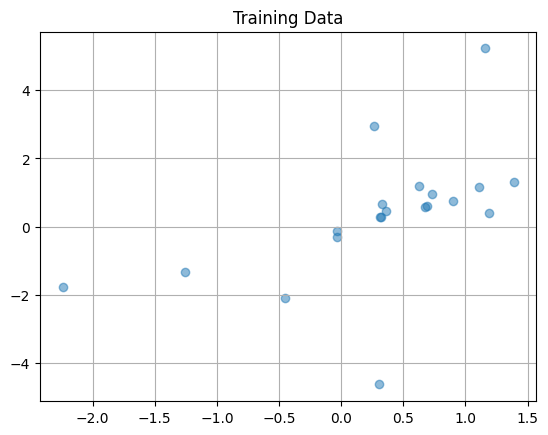

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples=20, input_dim=1, noise_std=0.3):
    """Generate synthetic data with controlled noise and outliers"""
    true_w = torch.ones(input_dim, 1)

    X = torch.randn(n_samples, input_dim)

    # Regular noise
    noise = torch.randn(n_samples, 1) * noise_std

    # Add some outliers
    n_outliers = int(0.2 * n_samples)  # 20% outliers
    outlier_idx = torch.randperm(n_samples)[:n_outliers]
    noise[outlier_idx] *= 10

    y = X @ true_w + noise

    return X, y

def plot_regression(X, y, w):
    """Plot data and regression line"""
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], y, alpha=0.5, label='Data')

    x_line = torch.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
    y_line = x_line @ w.T

    plt.plot(x_line, y_line, 'r-')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate some data
X, y = generate_data()

# Let's look at our data
plt.scatter(X, y, alpha=0.5)
plt.title("Training Data")
plt.grid(True)
plt.show()

In [15]:
noise_variance = 1
X, y = generate_data(noise_std=np.sqrt(noise_variance))

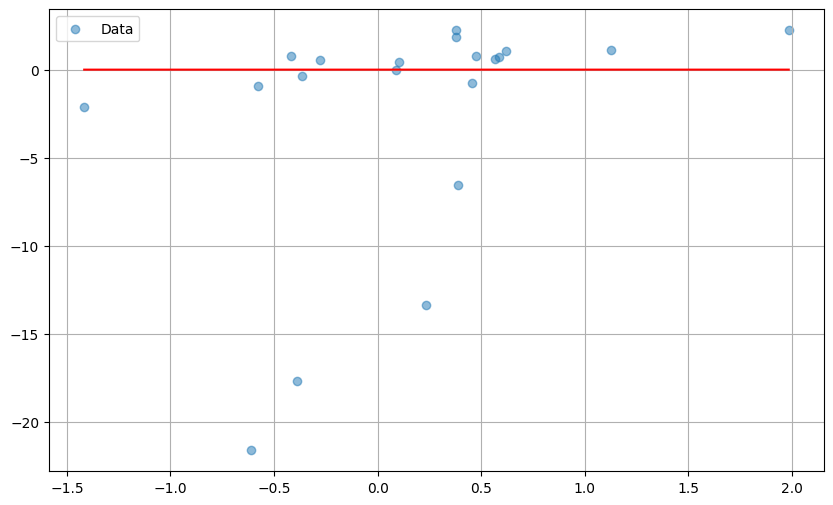

Learned weights: 0.0002632505202200264
Regularization coefficient: 99999.99999999999


In [22]:

# Now implement your regularized linear regression!
# Remember to derive the solution first on paper.

# Define your noise_variance and prior_variance here

prior_variance = 0.00001

# Implement the MAP (maximum a posteriori) solution for w
# Calculate regularization coefficient
lambda_reg = noise_variance / prior_variance

# Get dimensions
d = X.shape[1]  # input dimension

# Compute MAP solution
XTX = X.T @ X
XTy = X.T @ y
I = torch.eye(d)

w = torch.linalg.solve(XTX + lambda_reg * I, XTy)

# Once you have your solution, let's visualize it
plot_regression(X, y, w)

print(f"Learned weights: {w.squeeze().numpy()}")
print(f"Regularization coefficient: {lambda_reg}")

# Questions to consider:
# 1. How does your solution handle the outliers?
#    The regularization helps reduce the influence of outliers by penalizing large weights
# 2. Try changing your noise_variance and prior_variance - what happens?
#    Larger noise_variance or smaller prior_variance = more regularization hence simpler model
#    Smaller noise_variance or larger prior_variance = less regularization hence fits data more closely
# 3. What happens if you make either very large or very small?
#    Very large lambda: weights shrink to zero (underfitting)
#    Very small lambda: approaches MLE solution (may overfit to outliers)
# for your own sake, think - how would these insights translate or be implemented in more complex settings, e.g. when using a neural network?
#    In neural networks, this is L2 regularization / weight decay in the optimiser

## Part B - Ensembling as an Approximation of the Predictive Distribution

Although for linear regression we can compute exact solutions for all the distributions we reviewed earlier - as we did in class - typically this isn't the case. One nice but very general approximation we can use is approximating integrals by randomly sampling a few points and summing them up. For example, let's say we're computing the predictive distribution
$$
P(y^*|x^*, D) = \int P(y^*|x^*, M) P(M|D) dM
$$
Given new data $(x^*, y^*)$ and a model $M$, we can calculate $P(y^*|x^*, M)$, but we can't (in general) precisely calculate $P(M|D)$, because we don't have $P(D)$. However, because this integral is an expectation of $P(y^*|x^*, M)$ with respect to $P(M|D)$, we can approximate it using what's known as Monte Carlo sampling. If we can sample different models in a way that's proportional to $P(M|D)$ then we can approximate the integral as a sum.

---
**Q5:** let's first implement the simplest example of a Monte Carlo algorithm, where we randomly sample points to calculate pi. Let's say you randomly draw 2D points in [0,1]$\times$[0,1]. Imagine a quarter unit circle inscribed in that square, so a point falls inside it if $x^2+y^2<1$.  
a. What's the area of that quarter circle? What's the area of that square? What's the area of the quarter circle relative to the square?  
b. Create a short script that randomly draws many points and calculates what percent of them fall in the quarter circle. Use that and (a) to get an estimate of pi.

In [25]:
# fill me!
import numpy as np
import matplotlib.pyplot as plt

n_samples = 100000  # Number of random points to sample

x = np.random.uniform(0, 1, n_samples)
y = np.random.uniform(0, 1, n_samples)

# Check if points fall inside the quarter circle
inside_circle = (x**2 + y**2) < 1

# Calculate the ratio of points inside the circle
ratio_inside = np.sum(inside_circle) / n_samples

# Since ratio is pi/4, we have pi = 4 × ratio
pi_estimate = 4 * ratio_inside

print(f"Monte Carlo estimation with {n_samples} samples:")
print(f"Points inside circle: {np.sum(inside_circle)}")
print(f"Ratio inside: {ratio_inside:.6f}")
print(f"Estimated π: {pi_estimate:.6f}")



Monte Carlo estimation with 100000 samples:
Points inside circle: 78568
Ratio inside: 0.785680
Estimated π: 3.142720


Now, back to the machine learning. In practice, if we draw models properly then we can approximate our predictive distribution as
$$
P(y^*|x^*, D) \approx \frac{1}{n}\sum_{i=1}^n P(y^*|x^*, D, M_i)
$$

This is often known as *ensembling*, when we use several models instead of a single one to get better results. Although quite simple, this is often used to easily get better performance from an existing setup. Historically, most models that won the ILSVRC competitions (colloquially, the ImageNet competitions, where Alexnet made its debut) used some form of ensembling.

On a different note, there's still something we're hiding under the rug - how do we "sample models" properly? This is quite nontrivial and we'll address this properly later on. For now, we'll make do with directly optimising several models and taking them as-is.

---
**Q6:** optimise 3 simple networks to classify MNIST digits. How well do they perform separately vs when ensembled? Make sure you're using a GPU runtime so this'll be quick.

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Load and preprocess MNIST data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 345kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.89MB/s]


In [27]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [28]:
def train_model():
    model = MNISTNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    # Training loop
    for epoch in range(3):
        model.train()
        correct = 0
        total = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

        train_accuracy = 100. * correct / total
        print(f'Epoch {epoch+1}/5: Train Accuracy: {train_accuracy:.2f}%')

    # Test accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    test_accuracy = 100. * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

    return model


In [29]:
train_model()

Epoch 1/5: Train Accuracy: 93.06%
Epoch 2/5: Train Accuracy: 97.30%
Epoch 3/5: Train Accuracy: 98.30%
Test Accuracy: 97.81%


MNISTNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [30]:
def ensemble_predict():
    # Train 3 models
    print("Training 3 models for ensemble...")
    models = [train_model() for _ in range(3)]

    # Ensemble prediction: average the predictions from all models
    print("\nEnsemble prediction (averaging logits):")
    correct = 0
    total = 0

    for model in models:
        model.eval()

    with torch.no_grad():
        for data, target in test_loader:
            # Get predictions from all models and average them
            ensemble_output = torch.zeros(data.size(0), 10)
            for model in models:
                ensemble_output += model(data)
            ensemble_output /= len(models)  # Average the logits

            _, predicted = ensemble_output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    ensemble_accuracy = 100. * correct / total
    print(f'Ensemble Test Accuracy: {ensemble_accuracy:.2f}%')


In [31]:
ensemble_predict()

Training 3 models for ensemble...
Epoch 1/5: Train Accuracy: 93.10%
Epoch 2/5: Train Accuracy: 97.25%
Epoch 3/5: Train Accuracy: 98.21%
Test Accuracy: 97.90%
Epoch 1/5: Train Accuracy: 93.07%
Epoch 2/5: Train Accuracy: 97.30%
Epoch 3/5: Train Accuracy: 98.21%
Test Accuracy: 97.65%
Epoch 1/5: Train Accuracy: 93.15%
Epoch 2/5: Train Accuracy: 97.27%
Epoch 3/5: Train Accuracy: 98.09%
Test Accuracy: 97.65%

Ensemble prediction (averaging logits):
Ensemble Test Accuracy: 98.14%


NameError: name 'individual_accuracies' is not defined

## Part C (short and sweet) - how should we classify?

Often we want to classify something as belonging to one of two categories, e.g. cats and dogs, 0 or 1, etc. Naturally, a step function is well suited for describing this:
$$
\theta(x) = \begin{cases}
  1 & \text{if } x \geq 0 \\
  0 & \text{if } x < 0
\end{cases}
$$

However, often our inputs are nosiy. Let's say we have Gaussian noise $\epsilon \sim N(0, \sigma^2)$ added to our input x. What does $\theta(x + \epsilon)$ look like? Can you plot it?

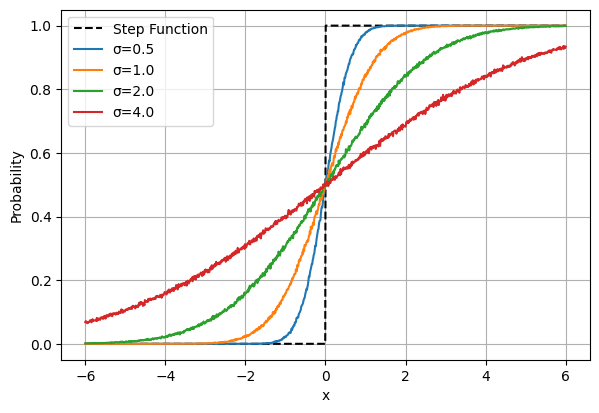

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create input space
x = np.linspace(-6, 6, 1000)

# Step function (threshold at x=0)
step = np.where(x >= 0, 1, 0)

# Function to compute probability of being above 0 given Gaussian noise

def prob_above_zero(x, noise_std):
    # Monte Carlo approach: sample noise and compute empirical probability
    # For each x value, sample many noise values and see what fraction gives x + ε > 0
    n_samples = 10000

    probs = np.zeros_like(x, dtype=float)

    for i, x_val in enumerate(x):
        # Sample noise: N(0, sigma^2)
        noise = np.random.normal(0, noise_std, n_samples)
        # Count how many times x + e > 0
        above_zero = (x_val + noise) > 0
        # Probability is the fraction of samples above zero
        probs[i] = np.mean(above_zero)

    return probs


# Different noise levels
noise_stds = [0.5, 1.0, 2.0, 4.0]

# Create visualization
plt.figure(figsize=(15, 10))

# Plot
plt.subplot(2, 2, 1)
plt.plot(x, step, 'k--', label='Step Function')
for std in noise_stds:
    plt.plot(x, prob_above_zero(x, std), label=f'σ={std}')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)


This is essentially plot of $\mathbb{E}_ϵ[\theta(x+\epsilon)]$ for different variance values for $\epsilon$

Hmmm, this is starting to look awfully familiar. Let's see if we can leverage this intuition a bit further.

**Q7:** let's try deriving this function analytically, specifically $\mathbb{E}_ϵ[\theta(x+\epsilon)]$ where $\epsilon\sim N(0,\sigma^2)$. What do we get? What would we typically call $\sigma^2$ here?

**A:** _answer me!_
### Q7 – Smeared-out step with Gaussian noise

Since $\theta(x+\epsilon) = 1$ iff $x+\epsilon \ge 0$,

$\mathbb{E}_\epsilon[\theta(x+\epsilon)]
= \mathbb{P}(x+\epsilon \ge 0)
= \mathbb{P}(\epsilon \ge -x).$

Standardize $\epsilon$:

Let $Z = \epsilon / \sigma \sim N(0,1)$. Then
$\mathbb{P}(\epsilon \ge -x)
= \mathbb{P}\Big(Z \ge -\frac{x}{\sigma}\Big)
= 1 - \Phi\Big(-\frac{x}{\sigma}\Big)
= \Phi\Big(\frac{x}{\sigma}\Big),$

where $\Phi$ is the CDF of the standard normal.

So
${\mathbb{E}_\epsilon[\theta(x+\epsilon)] = \Phi\Big(\frac{x}{\sigma}\Big)}$

which is a smooth S-shaped curve

Here, $\sigma^2$ is the **variance of the Gaussian noise** (noise variance); it controls how “blurred” or smooth the step becomes.


**Q8:** Often instead of this function we use a sigmoid instead. Try plotting them both and see how similar - or different - they may look given suitable parameters. Why would we prefer one over the other?

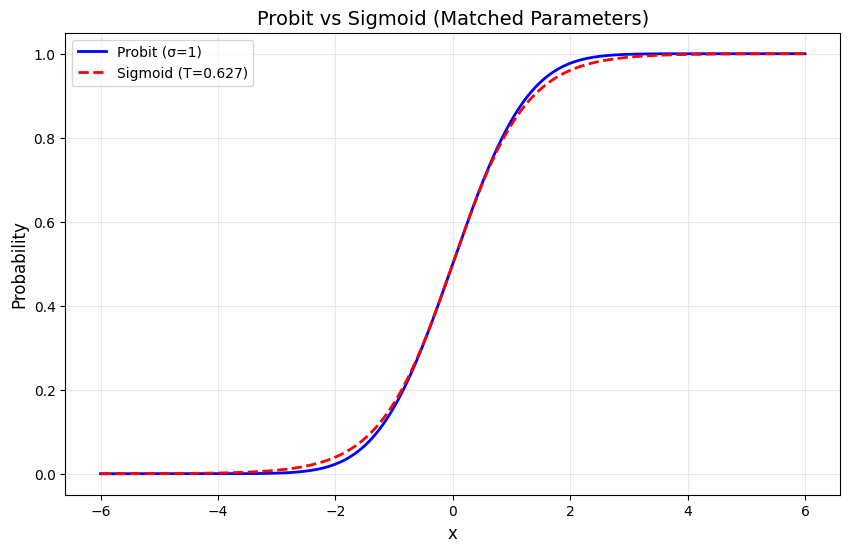

In [40]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create input space
x = np.linspace(-6, 6, 1000)

# Probit function: P(x + e > 0) where e is normally distributed with vairance, sigma^2
# This is the CDF of standard normal
def probit(x, sigma):
    return norm.cdf(x / sigma)

# Sigmoid function
def sigmoid(x, temperature=1.0):
    return 1 / (1 + np.exp(-x / temperature))

# Plot: Overlay probit and sigmoid with matched parameters
plt.figure(figsize=(10, 6))
sigma = 1
# For sigmoid, temperature = sigma * sqrt(pi/8) gives good match to probit
temp_matched = sigma * np.sqrt(np.pi / 8)
plt.plot(x, probit(x, sigma), 'b-', linewidth=2, label=f'Probit (σ={sigma})')
plt.plot(x, sigmoid(x, temp_matched), 'r--', linewidth=2, label=f'Sigmoid (T={temp_matched:.3f})')
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Probit vs Sigmoid (Matched Parameters)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()


We prefer sigmoid since it is computationally simpler (no need for CDF lookup) and easier to compute derivatives